# Data Visualization of the crimes committed in Montreal from 2015 to 2020, The dataset comes from http://donnees.ville.montreal.qc.ca/dataset/actes-criminels . however, I have removed all non-complete reports such as those missing a reported location, thus the information is not representative of the whole. This is done purely from an educational perspective. 

In [97]:
import pandas as pd

In [98]:
df = pd.read_csv('../data/interventionscitoyendo.csv', encoding='latin-1')

In [99]:
df.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122
3,Méfait,2017-07-21,jour,21.0,0.000000,0.000000e+00,1.000000,1.000000
4,Méfait,2017-07-29,jour,12.0,0.000000,0.000000e+00,1.000000,1.000000


In [100]:
df['CATEGORIE'].value_counts()

Vol dans / sur véhicule à moteur    49476
Introduction                        45367
Méfait                              37131
Vol de véhicule à moteur            23300
Vols qualifiés                       9739
Infractions entrainant la mort        136
Name: CATEGORIE, dtype: int64

In [101]:
df['LONGITUDE'].value_counts()

 1.000000     28857
-73.539019      309
-73.698049      289
-73.565691      287
-73.829217      270
              ...  
-73.604879        1
-73.685861        1
-73.830548        1
-73.853653        1
-73.519134        1
Name: LONGITUDE, Length: 17101, dtype: int64

## I will remove the records that have no location

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165149 entries, 0 to 165148
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CATEGORIE  165149 non-null  object 
 1   DATE       165149 non-null  object 
 2   QUART      165149 non-null  object 
 3   PDQ        165145 non-null  float64
 4   X          165149 non-null  float64
 5   Y          165149 non-null  float64
 6   LONGITUDE  165149 non-null  float64
 7   LATITUDE   165149 non-null  float64
dtypes: float64(5), object(3)
memory usage: 10.1+ MB


In [103]:
df = df[df.LONGITUDE != 1]
df = df[df.LONGITUDE != 1.0]
df = df[df.LATITUDE != 1]
df = df[df.LATITUDE != 1.0]

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136292 entries, 0 to 165148
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CATEGORIE  136292 non-null  object 
 1   DATE       136292 non-null  object 
 2   QUART      136292 non-null  object 
 3   PDQ        136292 non-null  float64
 4   X          136292 non-null  float64
 5   Y          136292 non-null  float64
 6   LONGITUDE  136292 non-null  float64
 7   LATITUDE   136292 non-null  float64
dtypes: float64(5), object(3)
memory usage: 9.4+ MB


## I will fix the formatting of the Year-month-date

In [105]:
df['DATE']

0         2018-09-13
1         2018-04-30
2         2018-09-01
6         2017-07-30
8         2017-08-01
             ...    
165144    2020-05-01
165145    2020-05-01
165146    2020-05-01
165147    2020-05-01
165148    2020-05-01
Name: DATE, Length: 136292, dtype: object

In [106]:
from datetime import date 
def getYear(str):
    year  = str.split('-')[0]
    return year
def getMonth(str):
    month  = str.split('-')[1]
    return month
def getDay(str):
    day  = str.split('-')[2]
    return day
def getDayOfTheWeek(str):
    formatted = str.split('-')
    day = date(int(formatted[0]),int(formatted[1]),int(formatted[2]))
    return day.weekday()

In [107]:
df['YEAR'] = df['DATE'].map(lambda x: getYear(x))
df['MONTH'] = df['DATE'].map(lambda x: getMonth(x))
df['DAY'] = df['DATE'].map(lambda x: getDay(x))
df['WEEKDAY'] = df['DATE'].map(lambda x: getDayOfTheWeek(x))

In [108]:
look_up = {0: 'Monday', 1: 'Tueday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday',
            5: 'Saturday', 6: 'Sunday'}
df['WEEKDAY'] = df['WEEKDAY'].apply(lambda x: look_up[x])

In [109]:
df.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE,YEAR,MONTH,DAY,WEEKDAY
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,2018,09,13,Thursday
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,2018,04,30,Monday
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122,2018,09,01,Saturday
6,Méfait,2017-07-30,jour,38.0,297654.715002,5.041877e+06,-73.591457,45.516776,2017,07,30,Sunday
8,Vol dans / sur véhicule à moteur,2017-08-01,jour,39.0,294259.780993,5.051450e+06,-73.635117,45.602873,2017,08,01,Tueday


In [110]:
df.drop(['DATE'], axis=1, inplace=True)

In [111]:
df.head()

,CATEGORIE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE,YEAR,MONTH,DAY,WEEKDAY
0,Vol de véhicule à moteur,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,2018,09,13,Thursday
1,Vol de véhicule à moteur,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,2018,04,30,Monday
2,Vol de véhicule à moteur,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122,2018,09,01,Saturday
6,Méfait,jour,38.0,297654.715002,5.041877e+06,-73.591457,45.516776,2017,07,30,Sunday
8,Vol dans / sur véhicule à moteur,jour,39.0,294259.780993,5.051450e+06,-73.635117,45.602873,2017,08,01,Tueday


Text(0.5, 1.0, 'Crimes Depending on the Weekday they were Reported')

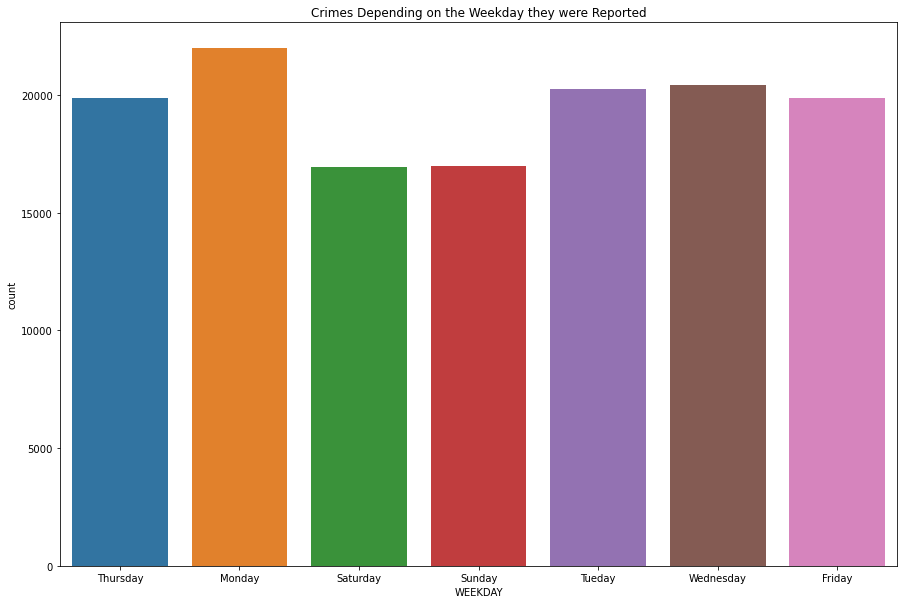

In [112]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='WEEKDAY', data= df, ax=ax)
ax.set_title("Crimes Depending on the Weekday they were Reported")

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Number of Different Types of Crime dependant on the time they were reported')

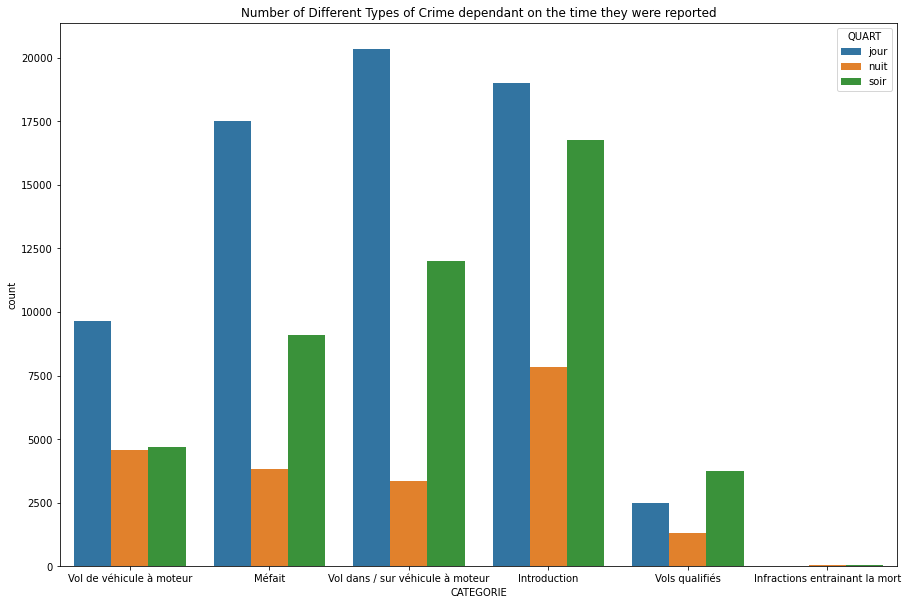

In [114]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='CATEGORIE', data= df, hue='QUART',ax=ax)
ax.set_title("Number of Different Types of Crime dependant on the time they were reported")

### converting the number of the month to the string

In [115]:
look_up = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
            '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}


In [116]:
df['MONTH'] = df['MONTH'].apply(lambda x: look_up[x])

Text(0.5, 1.0, "Number of Different Types of Crime dependant on the month they we're reported")

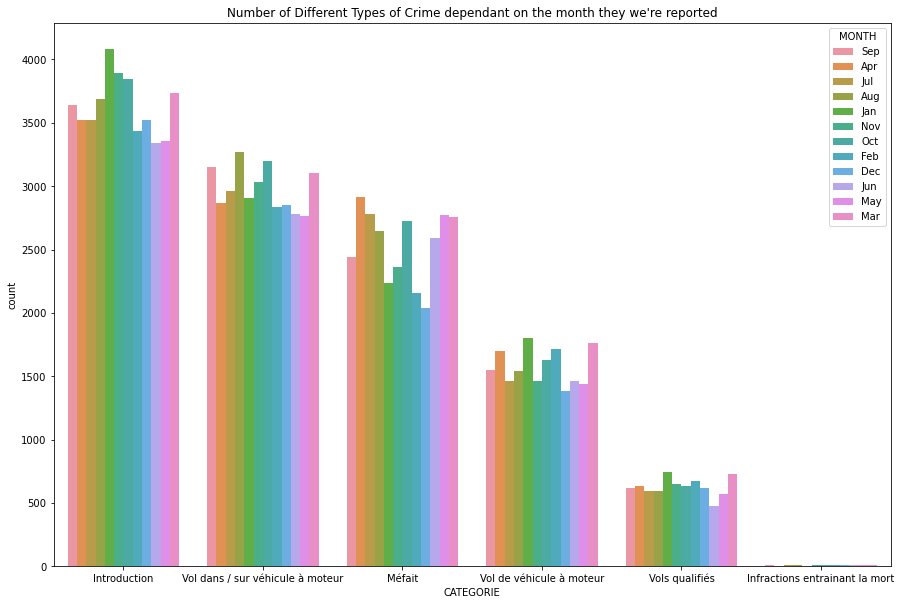

In [117]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='CATEGORIE', data= df, hue='MONTH',ax=ax, order = df['CATEGORIE'].value_counts().index)
ax.set_title("Number of Different Types of Crime dependant on the month they we're reported")

Text(0.5, 1.0, 'Crimes per Month')

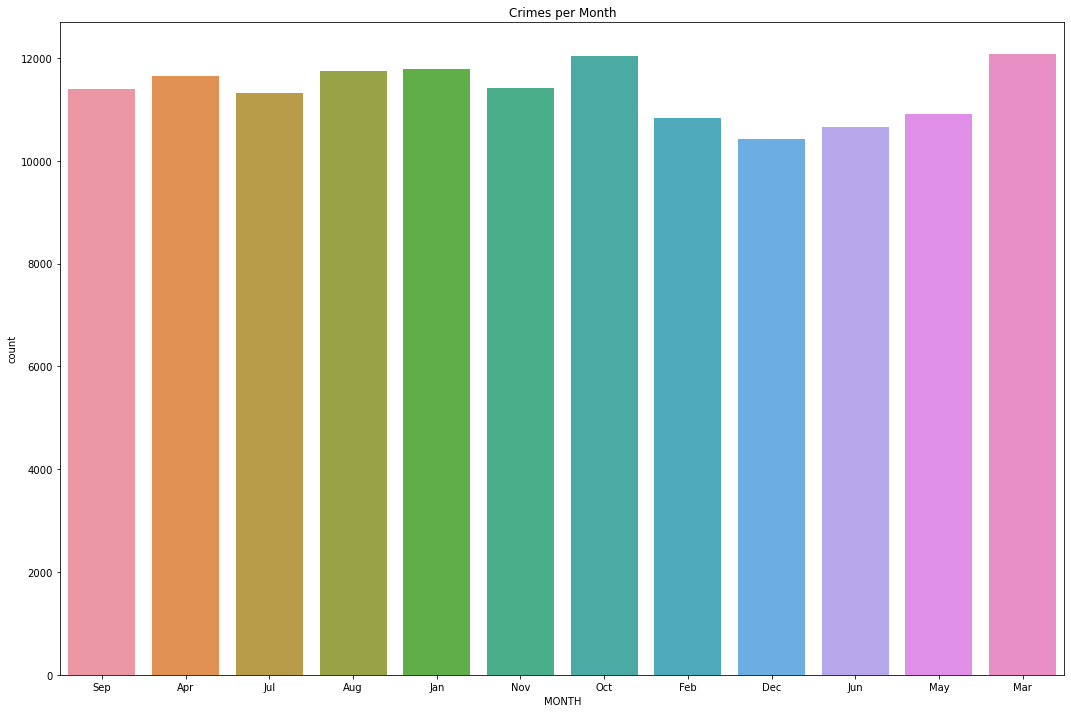

In [118]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='MONTH', data= df, ax=ax)
ax.set_title("Crimes per Month")

Text(0.5, 1.0, "Time of day the Crimes we're reported per month")

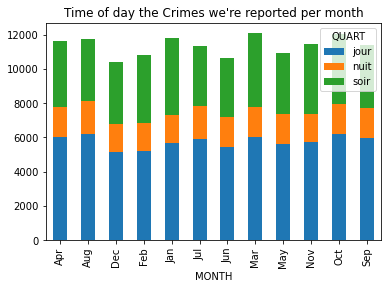

In [119]:
df_stackedPlot = df.groupby(['QUART', 'MONTH']).size().reset_index().pivot(columns='QUART', index='MONTH', values=0)
ax = df_stackedPlot.plot(kind='bar', stacked=True)
ax.set_title('Time of day the Crimes we\'re reported per month')

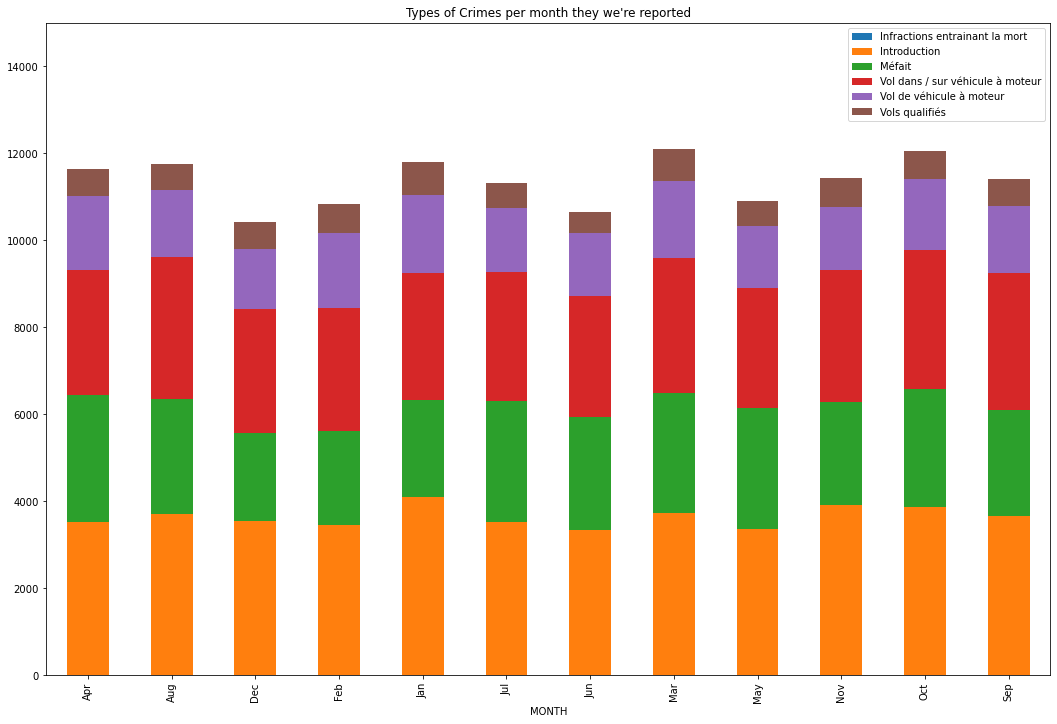

In [120]:
df_stackedPlot = df.groupby(['CATEGORIE', 'MONTH']).size().reset_index().pivot(columns='CATEGORIE', index='MONTH', values=0)
ax = df_stackedPlot.plot(kind='bar', stacked=True,figsize=(18,12),ylim=(0,15000))
ax.set_title('Types of Crimes per month they we\'re reported')
ax.legend(loc='upper right')

## Now I will add the neighbourhood where the crime was comitted using reverse geocoding

In [121]:
import reverse_geocoder as rg

In [122]:
df['latlng'] = df['LATITUDE'].astype(str) + ',' + df['LONGITUDE'].astype(str)

In [123]:
lst = []
def getNeighbourhood(fullInfo):
    for inf in fullInfo:
        x,y = inf.split(',')
        rw = rg.search((x,y) , mode=2)
        lst.append(rw)
    return lst

In [124]:
df['latlng']

0         45.567779812973136,-73.62677804694519
1         45.567779812973136,-73.62677804694519
2          45.51912164651682,-73.68592845221758
6         45.516776173604896,-73.59145726502281
8          45.60287333492722,-73.63511749556619
                          ...                  
165144     45.49357478648239,-73.58170454989259
165145      45.47787316642273,-73.5590947253677
165146    45.574118628942394,-73.63287376113567
165147     45.47577451373452,-73.86980952251012
165148     45.50338135993864,-73.68755336275154
Name: latlng, Length: 136292, dtype: object

In [125]:
ls = list(df['latlng'])

In [126]:
e = []
def getTuple(ls):
    for i in ls:
        tpl = tuple(i.split(','))
        e.append(tpl)
    return tuple(e)

In [127]:
df.head()

,CATEGORIE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE,YEAR,MONTH,DAY,WEEKDAY,latlng
0,Vol de véhicule à moteur,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,2018,Sep,13,Thursday,"45.567779812973136,-73.62677804694519"
1,Vol de véhicule à moteur,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,2018,Apr,30,Monday,"45.567779812973136,-73.62677804694519"
2,Vol de véhicule à moteur,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122,2018,Sep,01,Saturday,"45.51912164651682,-73.68592845221758"
6,Méfait,jour,38.0,297654.715002,5.041877e+06,-73.591457,45.516776,2017,Jul,30,Sunday,"45.516776173604896,-73.59145726502281"
8,Vol dans / sur véhicule à moteur,jour,39.0,294259.780993,5.051450e+06,-73.635117,45.602873,2017,Aug,01,Tueday,"45.60287333492722,-73.63511749556619"


In [128]:
df['GEOGRAPHIE'] = rg.search(getTuple(ls),mode=2)

In [129]:
def getBorough(info):
    return info.get('name')
def getAdministration(info):
    return info.get('admin2')

In [130]:
df['BOROUGH'] = df['GEOGRAPHIE'].apply(getBorough)

In [131]:
df['BOROUGH'].value_counts()

Montreal                    32823
Saint-Leonard               26516
Mont-Royal                  11552
Longueuil                    9590
Montreal-Est                 8836
Westmount                    8379
Saint-Raymond                7055
Saint-Laurent                5055
Laval                        4962
Montreal-Ouest               4615
Dollard-Des Ormeaux          3683
Dorval                       3164
Cote-Saint-Luc               2510
Pointe-Claire                2125
Hampstead                    1872
Kirkland                     1616
Beaconsfield                  576
Charlemagne                   542
Baie-D'Urfe                   370
Sainte-Anne-de-Bellevue       219
La Prairie                    102
Deux-Montagnes                101
Sainte-Marthe-sur-le-Lac       29
Name: BOROUGH, dtype: int64

In [132]:
df['ADMINISTRATION'] = df['GEOGRAPHIE'].apply(getAdministration)

In [133]:
df['ADMINISTRATION'].unique()

array(['Montreal', '', 'Monteregie', 'Laval', 'Lanaudiere', 'Laurentides'],
      dtype=object)

In [134]:
def renameEmpty(info):
    if (info == ''):
        return 'N\A'
    else:
        return info

In [135]:
df['ADMINISTRATION'] = df['ADMINISTRATION'].apply(renameEmpty)

In [136]:
df['ADMINISTRATION'].value_counts()

Montreal       61464
N\A            59502
Monteregie      9692
Laval           4962
Lanaudiere       542
Laurentides      130
Name: ADMINISTRATION, dtype: int64

Text(0.5, 1.0, 'Crime per Borough')

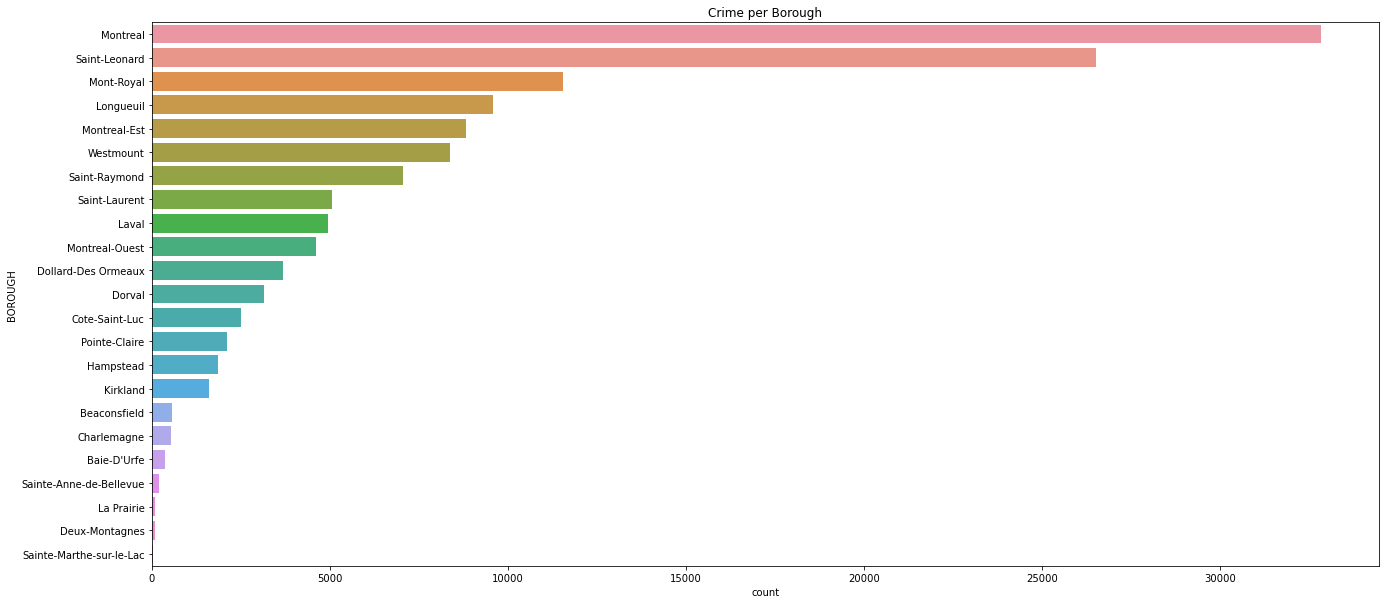

In [137]:
fig_dims = (22, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y='BOROUGH', data= df, ax=ax, order = df['BOROUGH'].value_counts().index)
ax.set_title("Crime per Borough")

Text(0.5, 1.0, 'Crime per Administration')

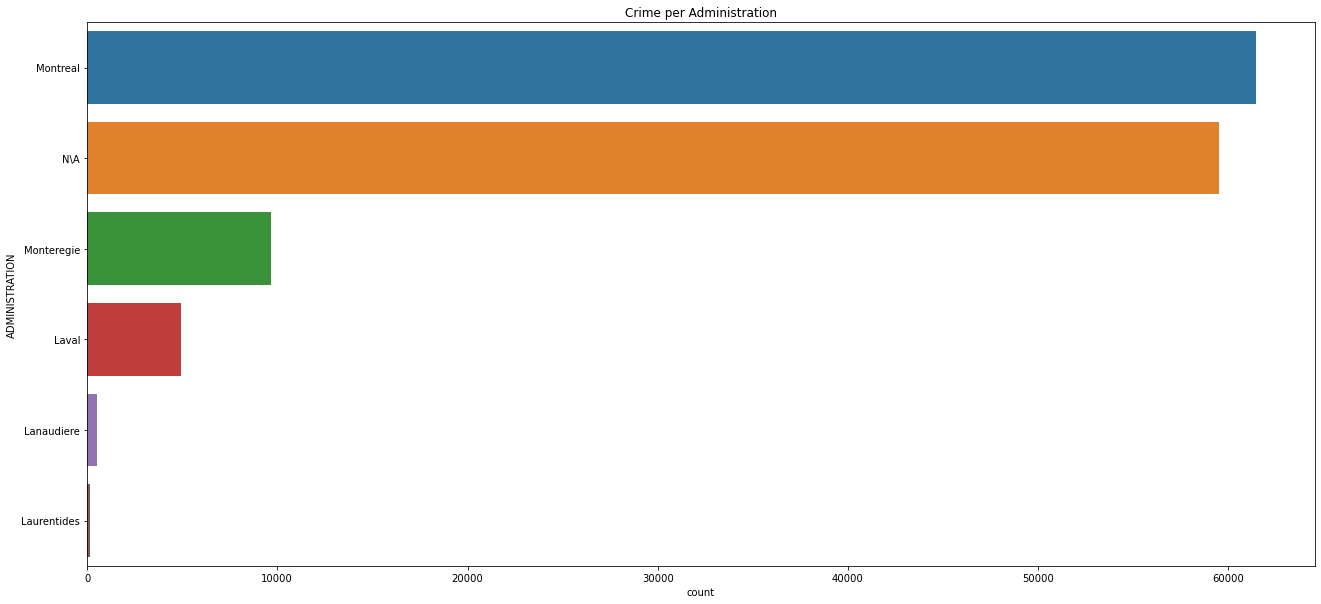

In [138]:
fig_dims = (22, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y='ADMINISTRATION', data= df, ax=ax, order = df['ADMINISTRATION'].value_counts().index)
ax.set_title("Crime per Administration")

## Now I'll clean up the dataframe by removing all the now pointless columns

In [139]:
df.drop(['latlng','GEOGRAPHIE','X','Y'], axis = 1, inplace=True)

In [141]:
df.columns

Index(['CATEGORIE', 'QUART', 'PDQ', 'LONGITUDE', 'LATITUDE', 'YEAR', 'MONTH',
       'DAY', 'WEEKDAY', 'BOROUGH', 'ADMINISTRATION'],
      dtype='object')

## Will now save the cleaned dataframe to a csv file 

In [144]:
# df.to_csv(r'../data/interventionscitoyendoCleaned.csv', encoding='latin-1')
# COMMENTED OUT TO NOT DO IT UNNECESSARILY